<a href="https://colab.research.google.com/github/peterbabulik/QuantumWalker/blob/main/HHHtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-ibm-runtime qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.9/359.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0

Successfully imported Qiskit Runtime modules.
Attempting to initialize IBM QiskitRuntimeService directly with provided token for instance: ibm-q/open/main


<ipython-input-2-281508471bb7>:36: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(


IBM QiskitRuntimeService initialized directly with provided token.

Attempting to get QPU backend: ibm_brisbane from QiskitRuntimeService...
Selected QPU backend for Qiskit Runtime: ibm_brisbane (Qubits: 127, Status: active)

Building a simple 3-qubit HHH test circuit...

--- Generated HHH Test Circuit ---
         ┌───┐ H_gates_done ┌─┐      
    q_0: ┤ H ├──────░───────┤M├──────
         ├───┤      ░       └╥┘┌─┐   
    q_1: ┤ H ├──────░────────╫─┤M├───
         ├───┤      ░        ║ └╥┘┌─┐
    q_2: ┤ H ├──────░────────╫──╫─┤M├
         └───┘      ░        ║  ║ └╥┘
c_out: 3/════════════════════╩══╩══╩═
                             0  1  2 

--- Transpiling and Running on ibm_brisbane ---
Transpiling HHH test for Qiskit Runtime backend...
HHH Test circuit depth original: 2, transpiled (ISA): 4
Using QiskitRuntimeService SamplerV2 for backend: ibm_brisbane
Job ID: d0gzyrkvpqf00084e3f0 submitted to Qiskit Runtime.
Waiting for results...
Processing SamplerV2 results...

--- Results ---
C

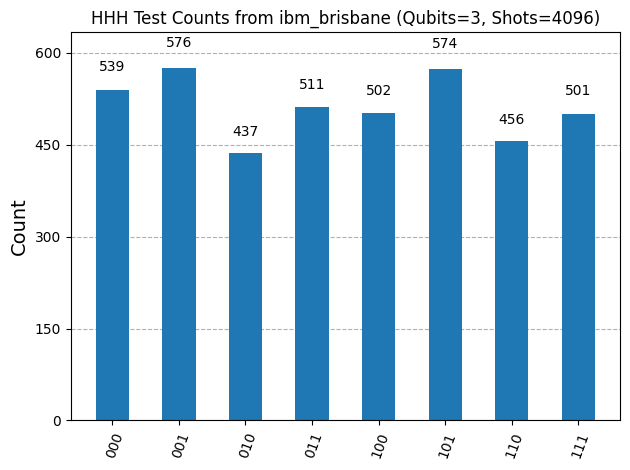


EXPERIMENT CONCLUDED. Please remember to invalidate the API token '99dd752798...' on the IBM Quantum website: https://quantum.ibm.com/account


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import time
import os

# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator

# Modern IBM Quantum access
try:
    from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    from qiskit_ibm_runtime.ibm_backend import IBMBackend as IBMRuntimeBackend
    qiskit_runtime_available = True
    print("Successfully imported Qiskit Runtime modules.")
except ImportError:
    print("CRITICAL WARNING: qiskit_ibm_runtime could not be imported. IBM Quantum execution will fail.")
    QiskitRuntimeService = None; Sampler = None; Session = None; generate_preset_pass_manager = None
    IBMRuntimeBackend = None
    qiskit_runtime_available = False

# --- Parameters ---
NUM_QUBITS_TEST = 3 # For HHH test

# --- IBM Quantum API Token and Instance Details ---
IBM_QUANTUM_TOKEN_DIRECT = 'API KEY HERE'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'
IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'

service = None
if qiskit_runtime_available:
    try:
        print(f"Attempting to initialize IBM QiskitRuntimeService directly with provided token for instance: {IBM_QUANTUM_INSTANCE_DIRECT}")
        service = QiskitRuntimeService(
            channel=IBM_QUANTUM_CHANNEL_DIRECT,
            instance=IBM_QUANTUM_INSTANCE_DIRECT,
            token=IBM_QUANTUM_TOKEN_DIRECT
        )
        print("IBM QiskitRuntimeService initialized directly with provided token.")
    except Exception as e:
        print(f"ERROR: Could not initialize QiskitRuntimeService directly with token: {e}")
        service = None
else:
    print("qiskit_ibm_runtime package is not available.")

# --- Select Backend ---
backend = None
backend_name_to_print = "AerSimulator (local)"
backend_target_name = 'ibm_brisbane'

if service:
    try:
        print(f"\nAttempting to get QPU backend: {backend_target_name} from QiskitRuntimeService...")
        qpu_backend_obj = service.backend(backend_target_name)
        if qpu_backend_obj:
            backend = qpu_backend_obj
            backend_name_to_print = backend.name
            current_status = backend.status()
            print(f"Selected QPU backend for Qiskit Runtime: {backend.name} (Qubits: {backend.num_qubits}, Status: {current_status.status_msg})")
            if hasattr(backend, 'status') and callable(backend.status) and current_status.status_msg != 'active':
                print(f"WARNING: QPU {backend.name} status is {current_status.status_msg}.")
        else:
            print(f"QPU backend {backend_target_name} not found or not available via service."); backend = None
    except Exception as e_qpu: print(f"Could not get QPU backend '{backend_target_name}': {e_qpu}"); backend = None

if backend is None:
    print("\nNo QPU backend successfully obtained. Falling back to local AerSimulator.")
    backend = AerSimulator()
    backend_name_to_print = "AerSimulator (local)"

# --- Define Test Circuit (HHH on 3 qubits) ---
print(f"\nBuilding a simple {NUM_QUBITS_TEST}-qubit HHH test circuit...")
qr_test = QuantumRegister(NUM_QUBITS_TEST, 'q')
cr_test = ClassicalRegister(NUM_QUBITS_TEST, 'c_out') # Classical register for measurement
qc_hhh_test = QuantumCircuit(qr_test, cr_test)

for qubit in qr_test:
    qc_hhh_test.h(qubit)
qc_hhh_test.barrier(label="H_gates_done")
qc_hhh_test.measure(qr_test, cr_test) # Measure all qubits in qr_test to cr_test

print("\n--- Generated HHH Test Circuit ---")
try: print(qc_hhh_test.draw(output='text', fold=-1))
except Exception as e_draw: print(f"Could not draw circuit: {e_draw}")


# --- Transpile and Run ---
print(f"\n--- Transpiling and Running on {backend_name_to_print} ---")
counts = {}
try:
    shots = 4096
    isa_circuit = qc_hhh_test
    is_runtime_target = False
    if qiskit_runtime_available and service and backend:
        if IBMRuntimeBackend and isinstance(backend, IBMRuntimeBackend): is_runtime_target = True
        elif hasattr(backend, 'provider') and "runtime" in str(type(backend.provider)).lower() and backend.name != "aer_simulator": is_runtime_target = True

    if is_runtime_target and generate_preset_pass_manager is not None:
        print("Transpiling HHH test for Qiskit Runtime backend...")
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        isa_circuit = pm.run(qc_hhh_test)
        print(f"HHH Test circuit depth original: {qc_hhh_test.depth()}, transpiled (ISA): {isa_circuit.depth()}")
    elif isinstance(backend, AerSimulator):
        print(f"Basic transpilation for {backend_name_to_print}...")
        isa_circuit = transpile(qc_hhh_test, backend=backend, optimization_level=1)
        print(f"HHH Test circuit depth original: {qc_hhh_test.depth()}, transpiled: {isa_circuit.depth()}")
    else:
        print(f"Using original circuit for {backend_name_to_print} (depth: {qc_hhh_test.depth()}).")

    if is_runtime_target and Sampler is not None and Session is not None :
        print(f"Using QiskitRuntimeService SamplerV2 for backend: {backend.name}")
        with Session(backend=backend) as session:
            sampler = Sampler()
            pub = (isa_circuit,)
            job = sampler.run([pub], shots=shots)
            print(f"Job ID: {job.job_id()} submitted to Qiskit Runtime.")
            print("Waiting for results...")
            result = job.result()
            print("Processing SamplerV2 results...")
            if result and len(result) > 0:
                pub_result = result[0]
                # When measuring into a named classical register (cr_test, named 'c_out')
                if hasattr(pub_result.data, cr_test.name):
                    bit_array_obj = getattr(pub_result.data, cr_test.name)
                    if bit_array_obj is not None: counts = bit_array_obj.get_counts()
                    else: print(f"WARNING: Data for '{cr_test.name}' is None."); counts = {}
                # measure_all() might default to 'meas' if the explicit creg mapping fails
                elif hasattr(pub_result.data, 'meas'):
                    bit_array_obj = pub_result.data.meas
                    if bit_array_obj is not None: counts = bit_array_obj.get_counts()
                    else: print("WARNING: Data for 'meas' is None."); counts = {}
                else: print(f"WARNING: No '{cr_test.name}' or 'meas' field. Attrs: {dir(pub_result.data)}"); counts = {}
            else: print("ERROR: Job result is None or empty from SamplerV2."); counts = {}
    elif isinstance(backend, AerSimulator):
        print(f"Using legacy backend.run() for {backend_name_to_print}")
        job = backend.run(isa_circuit, shots=shots)
        result = job.result()
        counts = result.get_counts(0) # For single circuit legacy run
    else:
        print(f"ERROR: No suitable execution path found. Backend: {backend.name if backend else 'None'}")
        counts = {}

    print("\n--- Results ---")
    print("Counts:", counts)

    if counts:
        from qiskit.visualization import plot_histogram
        fig = plot_histogram(counts, title=f"HHH Test Counts from {backend_name_to_print} (Qubits={NUM_QUBITS_TEST}, Shots={shots})")
        try: display(fig)
        except NameError: plt.show()
    else: print("No counts data to plot.")

except Exception as main_e:
    print(f"An error occurred in the main script: {main_e}")
    import traceback
    traceback.print_exc()
finally:
    print(f"\nEXPERIMENT CONCLUDED. Please remember to invalidate the API token "
          f"'{IBM_QUANTUM_TOKEN_DIRECT[:10]}...' "
          f"on the IBM Quantum website: https://quantum.ibm.com/account")